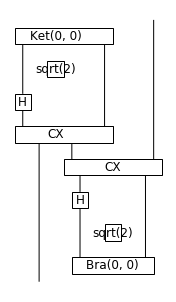

In [1]:
from discopy.circuit import *

snake = Circuit.caps(PRO(1), PRO(1)) @ Id(1) >> Id(1) @ Circuit.cups(PRO(1), PRO(1))
snake.draw(draw_types=False)

In [2]:
tk_circ, post_selection, scalar = snake.to_tk()
list(tk_circ)

[H q[0];,
 CX q[0], q[1];,
 CX q[1], q[2];,
 H q[1];,
 Measure q[2] --> c[1];,
 Measure q[1] --> c[0];]

In [3]:
from pytket.backends.ibm import AerBackend

In [4]:
snake.get_counts(AerBackend())

Matrix(dom=Dim(1), cod=Dim(2), array=[1.0078124, 0.0])

In [5]:
(Ket(0) >> snake).measure()

DeviceArray([0.99999976, 0.        ], dtype=float32)